<a href="https://colab.research.google.com/github/cleifton/Data_Science/blob/master/IBOV.08.2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as pltimport
import mplfinance as mpf

In [40]:
# Definir o período de dados
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365)  # 1 ano de dados


In [41]:
# Obter os dados do IBOV
ibov = yf.download('^BVSP', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [42]:
# Calcular médias móveis
ibov['SMA_21'] = ibov['Close'].rolling(window=21).mean()
ibov['SMA_80'] = ibov['Close'].rolling(window=80).mean()

In [43]:
# Calcular MACD
shortEMA = ibov['Close'].ewm(span=12, adjust=False).mean()
longEMA = ibov['Close'].ewm(span=26, adjust=False).mean()
ibov['MACD'] = shortEMA - longEMA
ibov['Signal Line'] = ibov['MACD'].ewm(span=9, adjust=False).mean()


In [44]:
# Calcular médias móveis
ibov['SMA_21'] = ibov['Close'].rolling(window=21).mean()
ibov['SMA_80'] = ibov['Close'].rolling(window=80).mean()

In [45]:
# Criar coluna para sinal de compra (1) ou venda (-1)
ibov['Signal'] = 0
ibov.loc[ibov['SMA_21'] > ibov['SMA_80'], 'Signal'] = 1  # Compra
ibov.loc[ibov['SMA_21'] < ibov['SMA_80'], 'Signal'] = -1  # Venda


In [46]:
# Calcular alvos
ibov['Target'] = ibov['Close'] * 1.05  # Por exemplo, 5% acima do preço atual

In [47]:
# Converter o índice para datetime
ibov.index = pd.to_datetime(ibov.index)

In [48]:
shortEMA = ibov['Close'].ewm(span=12, adjust=False).mean()
longEMA = ibov['Close'].ewm(span=26, adjust=False).mean()
ibov['MACD'] = shortEMA - longEMA
ibov['Signal Line'] = ibov['MACD'].ewm(span=9, adjust=False).mean()

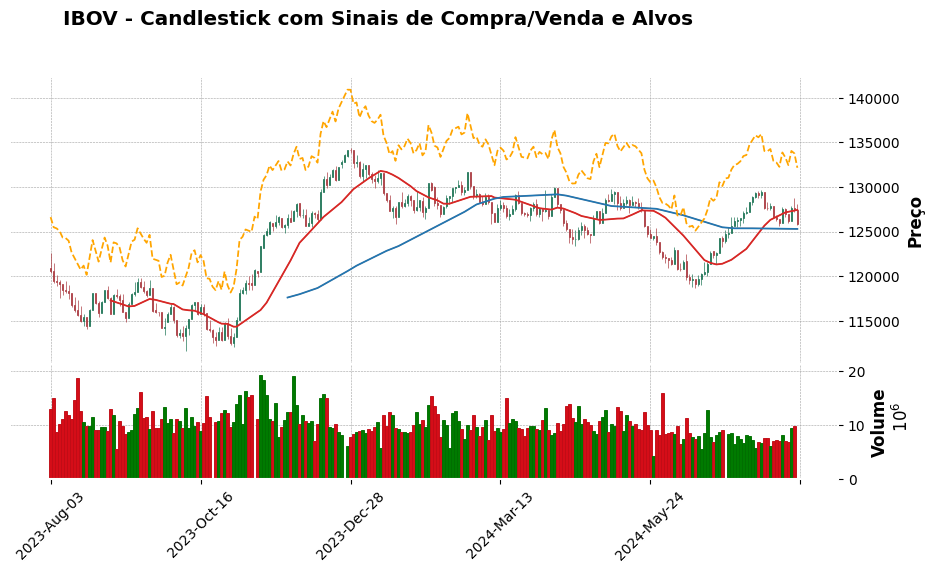

In [49]:
# Plotar os candlesticks com os sinais de compra/venda e alvos destacados
mpf.plot(ibov, type='candle', style='charles', ylabel='Preço', ylabel_lower='Volume',
         volume=True, figratio=(20,10),
         title='IBOV - Candlestick com Sinais de Compra/Venda e Alvos',
         mav=(21, 80),
         addplot=[
             mpf.make_addplot(ibov['SMA_21'], color='tab:red'),
             mpf.make_addplot(ibov['SMA_80'], color='tab:blue'),
             mpf.make_addplot(ibov['Target'], color='orange', linestyle='dashed'),
             mpf.make_addplot(ibov['Signal'], panel=1, color='g', markersize=200, marker='^'),
         ]
)

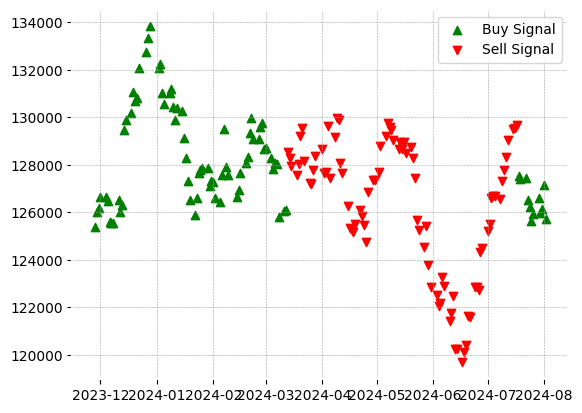

In [50]:
# Adicionar setas para sinais de compra e venda
buy_signals = ibov[ibov['Signal'] == 1]
sell_signals = ibov[ibov['Signal'] == -1]

plt.scatter(buy_signals.index, buy_signals['Low'] - 10, marker='^', color='green', label='Buy Signal')
plt.scatter(sell_signals.index, sell_signals['High'] + 10, marker='v', color='red', label='Sell Signal')

plt.legend()
plt.show()